In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import datetime as dt
from datetime import datetime as dtdt
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import ticker
import matplotlib.dates as mdates
from matplotlib.dates import date2num
from matplotlib.dates import DateFormatter
import seaborn as sns
sns.set()

In [2]:
path = "/Users/iomacbookair2/Documents/lab/DEIM2023/tweet_csv/221216_junk_fri.csv"
df = pd.read_csv((path))
df.sort_values(by = 'created_at', ascending = True, inplace = True)
df = df.reset_index(drop=True)
df['created_at'] = pd.to_datetime(df['created_at'])
df


,created_at,text,author_id,username
0,2022-12-17 01:00:00,#bananamoon,1105112430282137600,asukasan460810
1,2022-12-17 01:00:00,#bananamoon,1209122594902794241,yfmnaska4623
2,2022-12-17 01:00:00,#bananamoon,1441435410886893569,banana_himosamu
3,2022-12-17 01:00:00,#bananamoon,1273098105483919363,soy_sauce_bean
4,2022-12-17 01:00:00,#bananamoon,4714277066,Shichifukujin__
...,...,...,...,...
3282,2022-12-17 03:02:03,JUNK バナナマンのバナナムーンGOLD │ TBSラジオ 日村さん設楽さんお疲れ様でした...,1545340535753154561,4oV1YpDOSrJWFBA
3283,2022-12-17 03:02:05,お疲れ様でした〜 #bananamoon,1409138553922080772,Tamari_nogi46
3284,2022-12-17 03:02:12,来週のヒムペキグランド大賞にはchelmicoが来てくれます！ #bananamoon #c...,68944148,miyazakimori
3285,2022-12-17 03:02:46,今週も2時間あっという間でした！ お疲れさまでした！ #bananamoon,1564294499312222208,white_raven46


In [3]:
c_df = df.set_index('created_at').resample('T').count()
cnt = pd.DataFrame(
    {'created_at' : c_df.index.strftime('%Y-%m-%d %H:%M:%S'), 'counts' : c_df['text'].values})
cnt

,created_at,counts
0,2022-12-17 01:00:00,354
1,2022-12-17 01:01:00,92
2,2022-12-17 01:02:00,58
3,2022-12-17 01:03:00,64
4,2022-12-17 01:04:00,36
...,...,...
119,2022-12-17 02:59:00,35
120,2022-12-17 03:00:00,16
121,2022-12-17 03:01:00,2
122,2022-12-17 03:02:00,5


In [4]:
filename =  "count_221216_junk_fri.csv"
cnt.to_csv(filename, encoding = 'utf-8-sig')

In [5]:
max(cnt['counts']), min(cnt['counts'])

(354, 1)

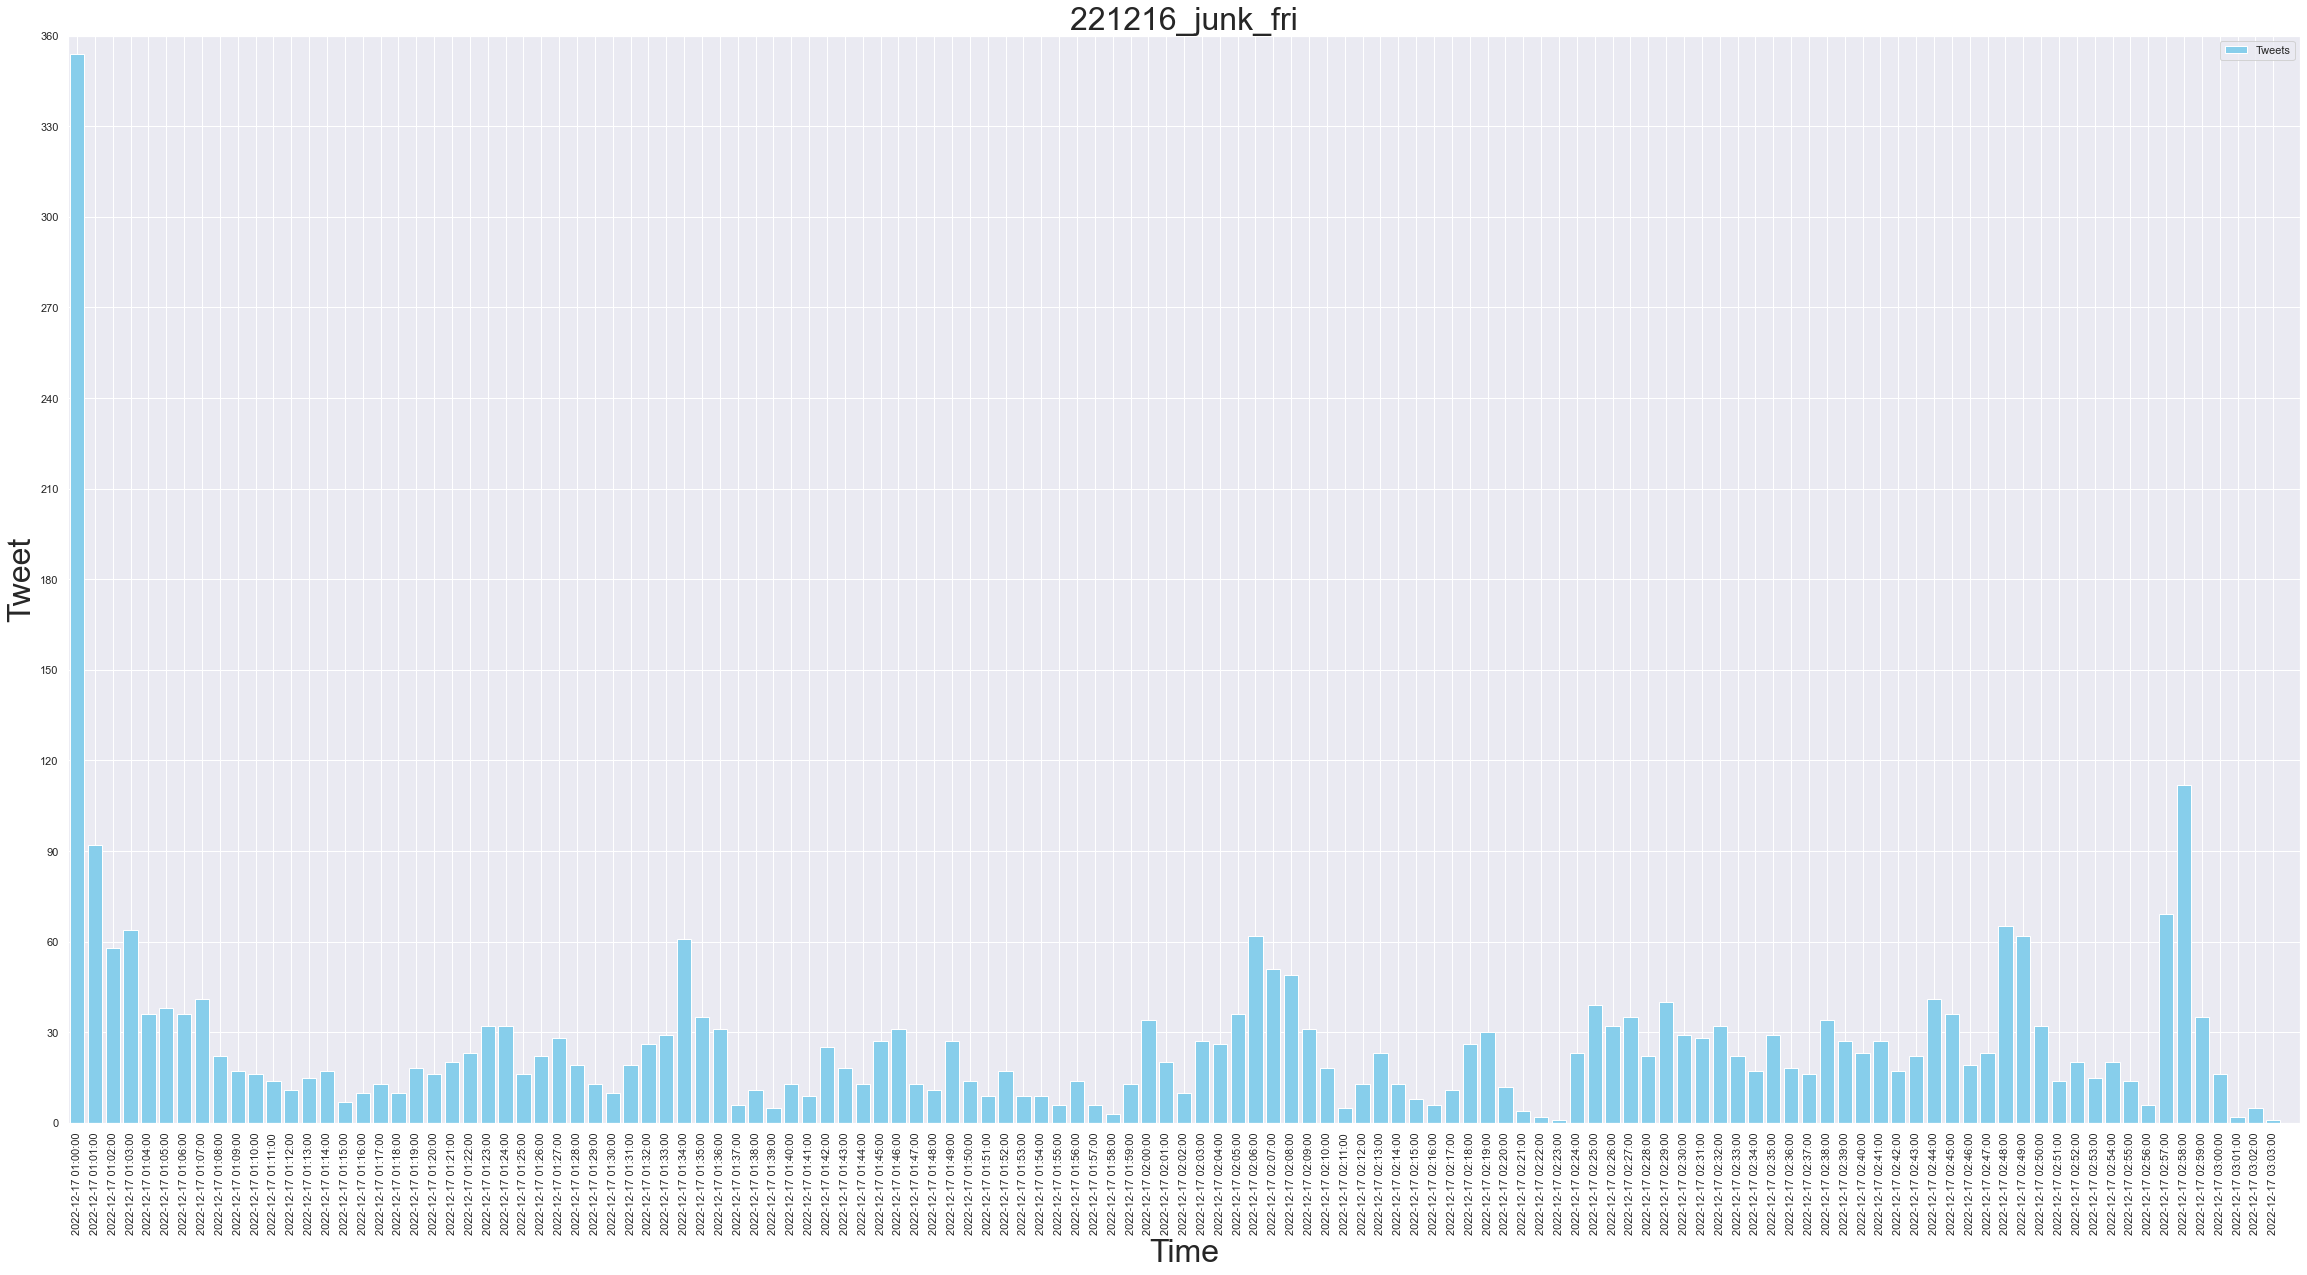

In [6]:
time = cnt['created_at']
tweets = cnt['counts']
fig = plt.figure(1, figsize=(40,20)) # 描画領域作成

c1,c2 = "skyblue", "black"
l1,l2 = "Tweets","Score"
axes = fig.add_subplot(111) # Axes作成
axes.set_xlabel("Time", fontsize = 32)
axes.set_ylabel("Tweet", fontsize = 32)
axes.bar(time, tweets, color=c1, label=l1)# 描画
axes.set_title("221216_junk_fri", fontsize = 32) # タイトル

# x軸
axes.tick_params(axis='x', rotation=90) # 軸目盛ラベルの回転
axes.set_xlim(-0.5, 124.5) # グラフの横幅と全体の端を揃える

# y軸
axes.set_ylim(0, 360) # y軸の範囲を指定する
start = 0
end = 361
stepsize = 30
axes.yaxis.set_ticks(np.arange(start, end, stepsize)) # y軸の間隔を指定する

axes.legend(loc=1)
# plt.savefig("thetrad220124.")